In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import sys
import seaborn as sns
import os
import re
import nltk
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

ModuleNotFoundError: No module named 'wordcloud'

In [2]:
# Load all CSV files in the specified directory
data_dir = "../data/unlabeled_data/"
csv_files = [file for file in os.listdir(data_dir) if file.endswith(".csv")]

# Concatenate all CSV files into a single DataFrame
all_data = []
for file in csv_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path)
    all_data.append(df)

data = pd.concat(all_data, ignore_index=True)

# Data Overview
print("Number of rows in each CSV file:")
for file, df in zip(csv_files, all_data):
    print(f"{file}: {len(df)}")

print("\nMissing values in each column:")
print(data.isna().sum())

Number of rows in each CSV file:
venezuela_201901_2_tweets.csv: 984980
GRU_202012_tweets.csv: 26684
uganda_0621_tweets.csv: 524081
REA_0621_tweets.csv: 7723
IRA_202012_tweets.csv: 68914

Missing values in each column:
tweetid                           0
userid                            0
user_display_name                 0
user_screen_name                  0
user_reported_location       511658
user_profile_description      36816
user_profile_url             933479
follower_count                    0
following_count                   0
account_creation_date             0
account_language                  0
tweet_language                10301
tweet_text                        0
tweet_time                        0
tweet_client_name                 0
in_reply_to_userid          1432081
in_reply_to_tweetid         1465837
quoted_tweet_tweetid        1543417
is_retweet                        0
retweet_userid              1561378
retweet_tweetid             1276785
latitude                  

In [3]:
# Language Analysis
language_counts = data["tweet_language"].value_counts()
language_percentage = language_counts / len(data) * 100
print("\nLanguage distribution:")
print(language_percentage)

print("\nTop non-English languages:")
non_english_languages = language_percentage.drop("en", errors="ignore")
print(non_english_languages.head())


Language distribution:
en     90.523462
und     4.039117
ru      0.943697
in      0.659273
tl      0.629752
es      0.604757
fr      0.292611
ar      0.279462
tr      0.185378
et      0.172168
ht      0.171796
de      0.138429
ro      0.084285
pt      0.068470
da      0.065617
nl      0.059601
it      0.056190
pl      0.053647
cs      0.042980
fi      0.037584
hi      0.033615
eu      0.031878
no      0.028281
sv      0.024002
cy      0.021335
hu      0.019412
ca      0.015877
lt      0.014947
bg      0.012652
uk      0.011722
sl      0.008931
lv      0.008745
ja      0.004962
is      0.003473
sk      0.002791
sr      0.002109
vi      0.001985
id      0.001799
ko      0.001054
ur      0.000992
fa      0.000868
el      0.000496
bs      0.000310
hr      0.000310
am      0.000124
zh      0.000062
hy      0.000062
ne      0.000062
Name: tweet_language, dtype: float64

Top non-English languages:
und    4.039117
ru     0.943697
in     0.659273
tl     0.629752
es     0.604757
Name: tweet_lan

[nltk_data] Downloading package stopwords to /home/bruno/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Distribution of follower counts:


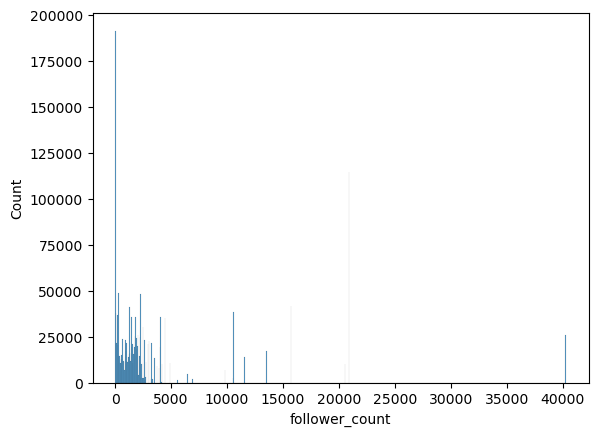


Distribution of following counts:


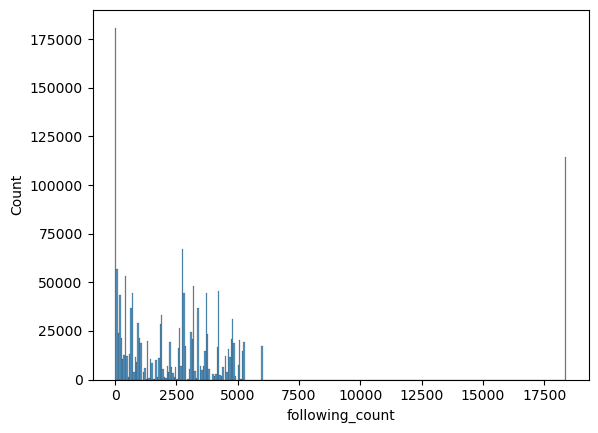


Top user-reported locations:
Estados Unidos             596740
Uganda                     126458
Uganda, Nigeria Online     114492
Kampala, Uganda             89962
Uganda, Nigeria Online      21314
Moscow, Russia              14646
Masaka, Uganda              13822
Syrian Arab Republic        10078
Moscow                       8153
East Africa                  7197
Name: user_reported_location, dtype: int64

Distribution of account creation dates:


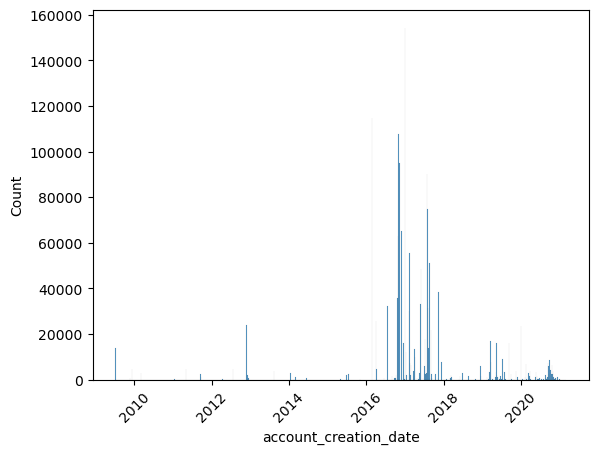

In [5]:
# Make sure you have NLTK stopwords downloaded
nltk.download('stopwords')

# Step 3: User Analysis
print("\nDistribution of follower counts:")
sns.histplot(data["follower_count"])
plt.show()

print("\nDistribution of following counts:")
sns.histplot(data["following_count"])
plt.show()

print("\nTop user-reported locations:")
print(data["user_reported_location"].value_counts().head(10))

print("\nDistribution of account creation dates:")
data['account_creation_date'] = pd.to_datetime(data['account_creation_date'])
sns.histplot(data['account_creation_date'])
plt.xticks(rotation=45)
plt.show()

In [7]:
# Step 4: Tweet Content Analysis
# Preprocess tweet text by removing stopwords, tokenizing, and lowercasing words
def preprocess_tweet_text(text):
    tokens = nltk.word_tokenize(text.lower())
    return [word for word in tokens if word.isalnum() and word not in stopwords.words("english")]

print("\nMost common words and phrases in tweet_text:")
all_words = [word for tweet in data["tweet_text"] for word in preprocess_tweet_text(tweet)]
word_freq = Counter(all_words)
print(word_freq.most_common(10))

print("\nDistribution of tweet lengths:")
data["tweet_length"] = data["tweet_text"].apply(lambda x: len(x.split()))
sns.histplot(data["tweet_length"])
plt.show()

print("\nFrequency of hashtags and URLs:")
data["hashtags_count"] = data["hashtags"].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)
data["urls_count"] = data["urls"].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)
print("Hashtags count:\n", data["hashtags_count"].describe())
print("URLs count:\n", data["urls_count"].describe())

print("\nMost common hashtags:")
hashtags = [hashtag for hashtags in data["hashtags"] for hashtag in str(hashtags).split(',')]
hashtag_freq = Counter(hashtags)
print(hashtag_freq.most_common(10))

print("\nMost common URLs:")
urls = [url for urls in data["urls"] for url in str(urls).split(',')]
url_freq = Counter(urls)
print(url_freq.most_common(10))

# Visualize most common words using WordCloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords.words("english"), min_font_size=10).generate_from_frequencies(word_freq)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Most common words and phrases in tweet_text:


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/home/bruno/nltk_data'
    - '/home/bruno/anaconda3/envs/my_env/nltk_data'
    - '/home/bruno/anaconda3/envs/my_env/share/nltk_data'
    - '/home/bruno/anaconda3/envs/my_env/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************



Distribution of engagement metrics:


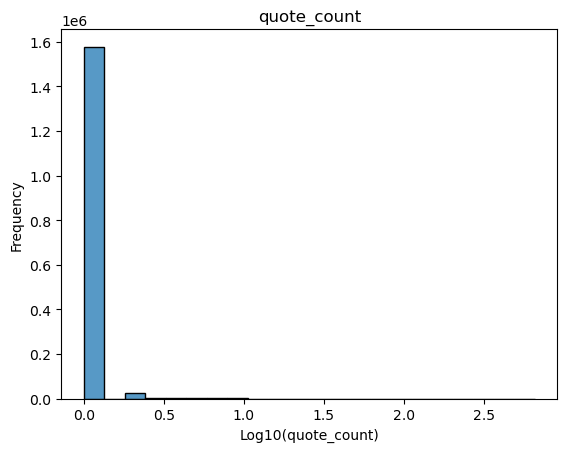

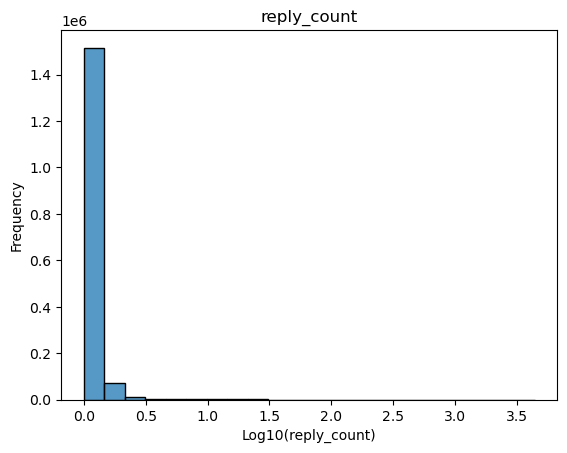

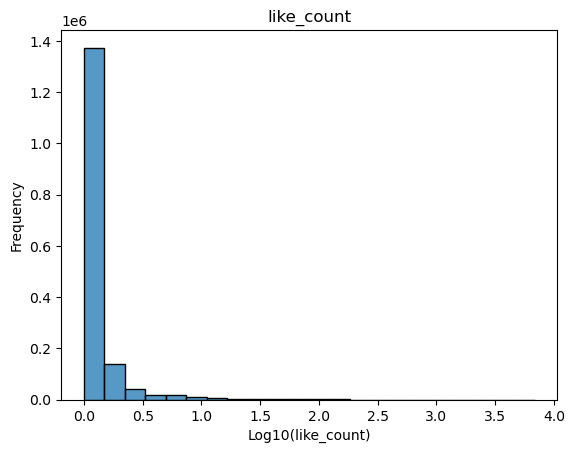

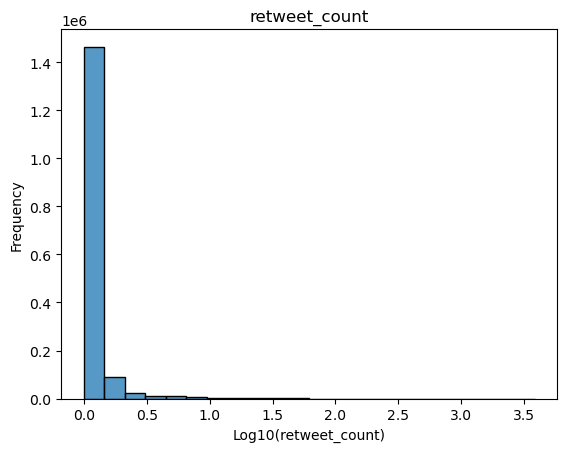


Top tweets based on engagement metrics:
                                                tweet_text  quote_count  \
1318178  I need remedy 4 my face, I hv used different k...        661.0   
1556955  Always proud to wear my best chavez attire and...        389.0   
1322818  What's your favorite?\nRoasted or boiled?😋 htt...        358.0   
1344562  59 people die as Pastor gives them dettol to d...        237.0   
648445   RT FiIibuster: President Trump March Huntingto...        204.0   
219703   Sean Hannity Asks CBS Release All of His Ted K...        185.0   
1140280  Retweet if you feel touched.😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭...        185.0   
1543072  #Malawi launches operation to flush out illega...        185.0   
165621   RT DrewLiquerman: BUSTED!!!!!!! \n\nTwitter ca...        149.0   
1436495  I’m just imagining the praises some of us woul...        133.0   

         reply_count  like_count  retweet_count  
1318178       4444.0      6874.0         1830.0  
1556955        190.0        39.0 

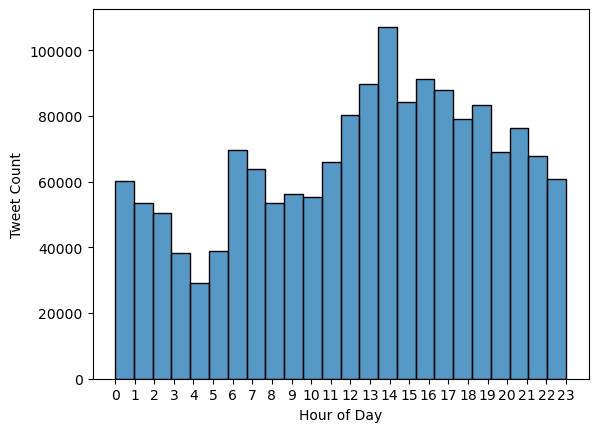


Trends over days of the week:


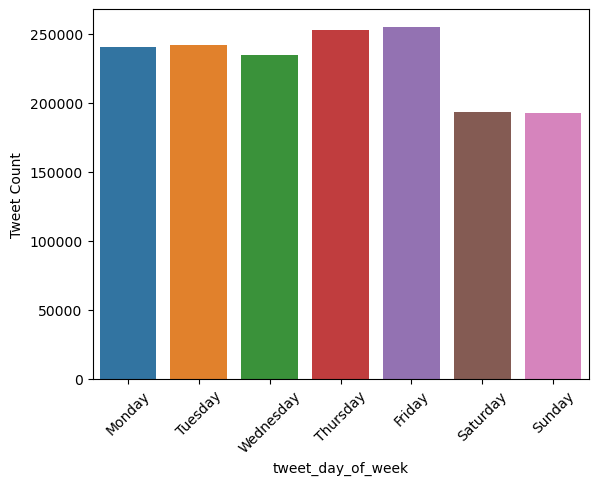


Trends over months:


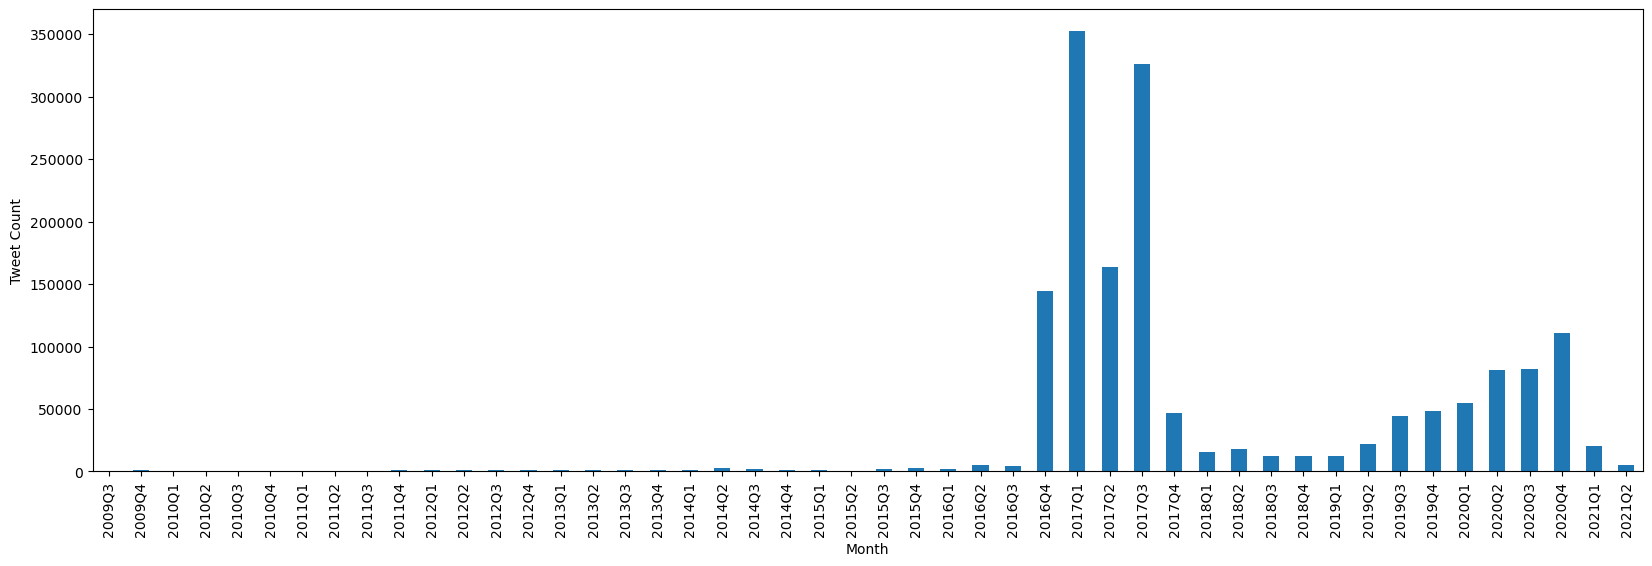

In [15]:
# Tweet Engagement Analysis
engagement_metrics = ['quote_count', 'reply_count', 'like_count', 'retweet_count']

print("\nDistribution of engagement metrics:")
for metric in engagement_metrics:
    # Adding 1 to avoid errors with log10(0)
    data[metric+'_log'] = data[metric].apply(lambda x: np.log10(x + 1))
    sns.histplot(data[metric+'_log'])
    plt.title(metric)
    plt.xlabel(f'Log10({metric})')
    plt.ylabel('Frequency')
    plt.show()

print("\nTop tweets based on engagement metrics:")
top_tweets = data.nlargest(10, engagement_metrics)
print(top_tweets[['tweet_text'] + engagement_metrics])

# Step 6: Temporal Analysis
print("\nDistribution of tweet times:")
data['tweet_time'] = pd.to_datetime(data['tweet_time'])
data['tweet_hour'] = data['tweet_time'].dt.hour
sns.histplot(data['tweet_hour'], bins=24, kde=False)
plt.xticks(range(0, 24))
plt.xlabel('Hour of Day')
plt.ylabel('Tweet Count')
plt.show()

print("\nTrends over days of the week:")
data['tweet_day_of_week'] = data['tweet_time'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=data, x='tweet_day_of_week', order=days_order)
plt.xticks(rotation=45)
plt.ylabel('Tweet Count')
plt.show()

print("\nTrends over months:")
data['tweet_month'] = data['tweet_time'].dt.to_period('Q')
monthly_counts = data['tweet_month'].value_counts().sort_index()
plt.figure(figsize=(20, 6))  # Adjust the figure size for better readability
monthly_counts.plot(kind='bar')
plt.xticks(rotation=90)  # Rotate the x-tick labels to prevent overlapping
plt.xlabel('Month')
plt.ylabel('Tweet Count')
plt.show()

In [16]:
# Filter English tweets using the tweet_language column
data = data[data['tweet_language'] == 'en']

# Clean and preprocess the text data
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters and numbers
    text = text.lower().strip()  # Convert to lowercase and remove extra spaces
    return text

data['clean_tweet_text'] = data['tweet_text'].apply(clean_text)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Transform the text data into a suitable format using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(data['clean_tweet_text'])

# Display the shape of the TF-IDF matrix
print("\nShape of the TF-IDF matrix:")
print(tfidf_matrix.shape)


Shape of the TF-IDF matrix:
(1459584, 5000)


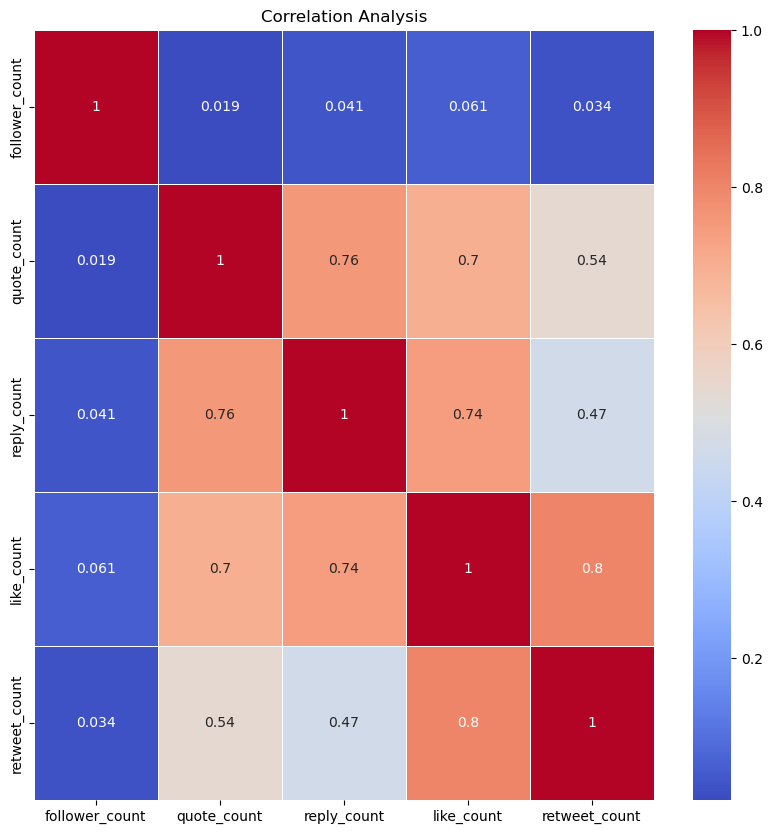

In [19]:
# Calculate the correlation matrix for engagement metrics and follower count
engagement_metrics = ['follower_count', 'quote_count', 'reply_count', 'like_count', 'retweet_count']
correlation_matrix = data[engagement_metrics].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Analysis")
plt.show()

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

# Apply t-SNE to the tfidf_matrix
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(tfidf_matrix)

# Plot the t-SNE results
tsne_df = pd.DataFrame(tsne_data, columns=['x', 'y'])
plt.figure(figsize=(12, 8))
sns.scatterplot(data=tsne_df, x='x', y='y')
plt.title('t-SNE Visualization')
plt.show()